In [11]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
connection = sqlite3.connect('olist.db')

df_reviews = pd.read_sql_query('SELECT * FROM ReviewsClean', connection)

connection.close()

## Analyse de review score

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_14392\3227791971.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(
c:\Users\Utilisateur\Documents\projet_techia\data_analys\env\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Utilisateur\Documents\projet_techia\data_analys\env\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Utilisateur\Documents\p

Text(0.5, 1.0, 'distribution des notes attribuées')

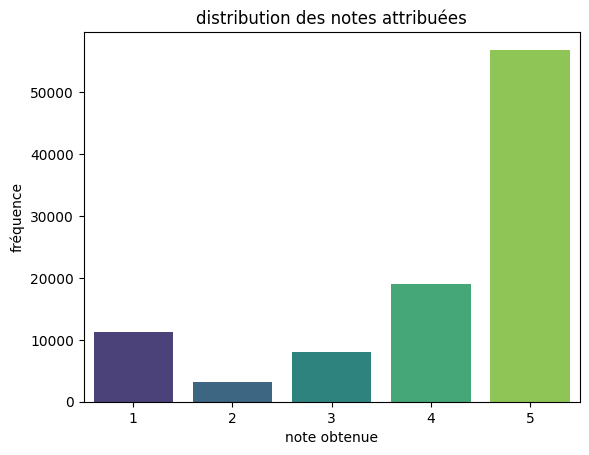

In [13]:


ax = sns.countplot(
   x = 'review_score',  data = df_reviews, palette = 'viridis'
)
ax.set_title('distribution des notes attribuées')

plt.xlabel('note obtenue')
plt.ylabel('fréquence')
plt.title('distribution des notes attribuées')

In [14]:
import numpy as np 

In [15]:
df_reviews['score'] = np.where(df_reviews['review_score'] ==5,1,0)




In [25]:
def f(x):
    if x == 5:
        return 1
    else:
        return 0
    
    #même fonction mais en lambda

lambda x : 1 if x == 5 else 0

<function __main__.<lambda>(x)>

In [24]:
df_reviews['score'] = df_reviews['review_score'].apply(f)

In [ ]:
#fonction lambda, sur une seule ligne

lambda x: x+2



<class 'str'>
<class 'str'>


C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_14392\193895464.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='score', data=df_reviews, palette='viridis')
c:\Users\Utilisateur\Documents\projet_techia\data_analys\env\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Utilisateur\Documents\projet_techia\data_analys\env\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_g

Text(0, 0.5, 'Fréquence')

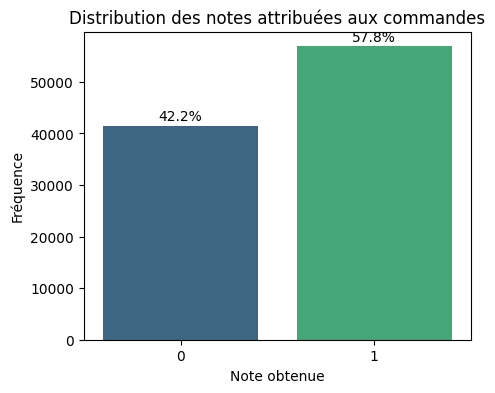

In [16]:
df_reviews['score'] = df_reviews['review_score'].apply(lambda x : 1 if x==5 else 0)
df_reviews['score'].value_counts() 

plt.figure(figsize=(5, 4))
ax = sns.countplot(x='score', data=df_reviews, palette='viridis')

# Add percentages to each bar
total = len(df_reviews['score'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    # percentage = 100 * p.get_height() / total
    print(type(percentage))
    x = p.get_x() + p.get_width() / 2 
    y = p.get_height() + 1000
    ax.annotate(percentage, (x, y), ha='center')


ax.set_title('Distribution des notes attribuées aux commandes')
ax.set_xlabel('Note obtenue')
ax.set_ylabel('Fréquence')

In [17]:
connection = sqlite3.connect("olist.db")

df = pd.read_sql_query("SELECT * FROM CleanDataset",connection)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98344 entries, 0 to 98343
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   review_id                      98344 non-null  object
 1   order_id                       98344 non-null  object
 2   review_score                   98344 non-null  int64 
 3   review_comment_title           98344 non-null  object
 4   review_comment_message         98344 non-null  object
 5   review_creation_date           98344 non-null  object
 6   review_answer_timestamp        98344 non-null  object
 7   customer_id                    98344 non-null  object
 8   order_status                   98344 non-null  object
 9   order_purchase_timestamp       98344 non-null  object
 10  order_approved_at              98344 non-null  object
 11  order_delivered_carrier_date   98344 non-null  object
 12  order_delivered_customer_date  95542 non-null  object
 13  o

### Créer variables:
retard_livraison(date_estimée - date_livraison)
temps_livraison (date_livraison - date_commande)
produit reçu: date de livraison et antérieure à la date du commentaire

### Faire analyse univariée de ces variables
voir si la donnée est propre (pas d'outliers)
comprendre la distribution (univarié: histogramme ou boxplot)

### Faire analyse bivariée avec la variable cible de ces variables
voir le potentiel explicatif
comprendre la relation entre les 2 variables

In [ ]:
from utils import import_clean_dataset

df = import_clean_dataset()
df['score'] = df['review_score'].apply(lambda x : 1 if x==5 else 0)

In [ ]:
df["temps_livraison"] = (df.order_delivered_customer_date - df.order_purchase_timestamp).dt.days

In [ ]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(8, 4))
# Plot the histogram
ax1.hist(df.temps_livraison, bins=100, color='skyblue', edgecolor='black')

# Add labels and title
ax1.set_xlabel('Values')
ax1.set_ylabel('Frequency')
ax1.set_title('Distribution de temps de livraison')

# Plot the histogram
ax2 = sns.boxplot(x=df.temps_livraison, color='skyblue')

# Add labels and title
ax2.set_xlabel('Values')
ax2.set_ylabel('Quantiles')
ax2.set_title('Distribution de temps de livraison')

# Show the plot
plt.show()

In [ ]:
# Plot the histogram
ax = sns.boxplot(x=df.temps_livraison, hue = df.score, showfliers=False)

# Add labels and title
ax.set_xlabel('Temps de livraiso,')
ax.set_ylabel('Score')
ax.set_title('Distribution de temps de livraison')

# Show the plot
plt.show()

In [ ]:
df[["score","temps_livraison"]].groupby(by='score').describe()

## Retard livraison

In [ ]:
df["retard_livraison"] = (df.order_delivered_customer_date - df.order_estimated_delivery_date).dt.days

In [ ]:
df[["order_estimated_delivery_date","order_delivered_customer_date", "retard_livraison"]].head()

In [ ]:
fig,(ax1,ax2,ax3) = plt.subplots(3,1, figsize=(8, 6))
# Plot the histogram
ax1.hist(df["retard_livraison"] , bins=8, color='skyblue', edgecolor='black')

# Add labels and title
ax1.set_xlabel('Values')
ax1.set_ylabel('Frequency')
ax1.set_title('Distribution de temps de livraison')

# Plot the histogram
ax2 = sns.boxplot(x=df["retard_livraison"] )

# Add labels and title
ax2.set_xlabel('Values')
ax2.set_ylabel('Quantiles')
ax2.set_title('Distribution de temps de livraison')

# Plot the histogram
ax3 = sns.boxplot(x=df["retard_livraison"] , showfliers=False)

# Add labels and title
ax3.set_xlabel('Values')
ax3.set_ylabel('Quantiles')
ax3.set_title('Distribution de temps de livraison')


# Show the plot
plt.show()

In [ ]:
# Plot the histogram
ax = sns.boxplot(x=df["retard_livraison"] , hue = df['score'], showfliers=False)

# Add labels and title
ax.set_xlabel('Values')
ax.set_ylabel('Quantiles')
ax.set_title('Distribution de temps de livraison')

# Show the plot
plt.show()

In [ ]:
df[["score","retard_livraison"]].groupby(by='score').describe()

Conclusion de l'analyse de retard de livraison:

il y a des valeurs extremes pour retard de livraison, un travail est potentiellement nécessaire:
Soit binariser la variable (créer des catégories)
Soit plafonner la variable (remplace les valeurs extreme par un maximum qu'on défini)
Soit laisser telle quelle la variable
Les écarts de moyene et de médiane semblent nous indiquer un pouvoir explicatif de la variable retard de livraison sur la satisfaction.
On se pose également la question de savoir si ce pouvoir explicatif est le meme que celui de temps de livraison ou si ce sont deux explications distinctes

## Analyse des dates de livraisons nulles

In [ ]:
df.loc[df["order_delivered_customer_date"].isna(),:]["score"].value_counts()

In [ ]:
def f(x):
    (delivered_date,review_date)=x
    if pd.isna(delivered_date):
        return 0
    elif delivered_date.normalize()>review_date:
        return 0
    else:
        return 1

df['produit_recu'] = df[["order_delivered_customer_date","review_creation_date"]].apply(f, axis=1)

In [ ]:
df[["order_delivered_customer_date","review_creation_date","produit_recu"]].head(15)

In [ ]:
df[["score","produit_recu"]].groupby(by='produit_recu').describe()

Conclusion pour produit reçu:

seulement 8% des commentaires concerne des gens qui n'ont pas reçu leur commande
Cependant l'écart de satisfaction entre ceux qui l'ont reçu et ceux qui ne l'ont pas reçu est très important, on s'attend donc a un pouvoir explicatif fort